Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8109 - loss: 0.7209
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.3108
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9228 - loss: 0.2836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2760
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9250 - loss: 0.2672
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.2990
Test Accuracy: 0.9265999794006348
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicted label: 7
Actual label: 7


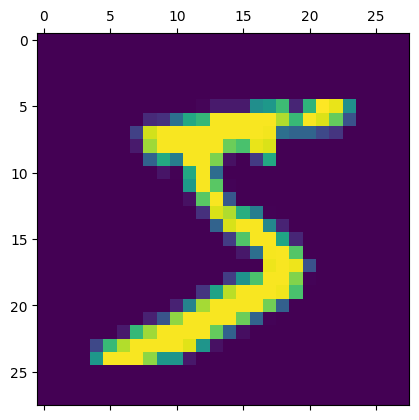

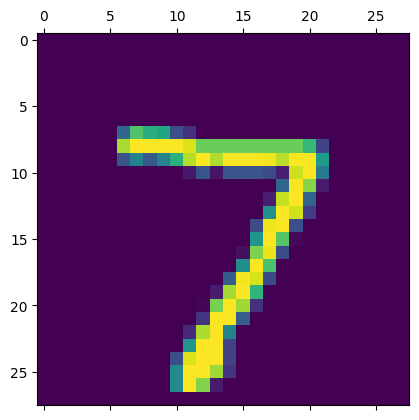

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Check shapes
print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

# Visualize an image
plt.matshow(x_train[0])

# Normalize pixel values (Only for x_train)
x_train = x_train / 255.0
x_test = x_test / 255.0  # Also normalize test data

# Flatten the image data
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flat, y_train, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Accuracy:", test_accuracy)

# Visualize a test image
plt.matshow(x_test[0])

# Predict on test data
predictions = model.predict(x_test_flat)

# Print predicted and actual value for first test image
print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", y_test[0])


In [8]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9150 - loss: 0.2990


[0.2638903260231018, 0.9265999794006348]

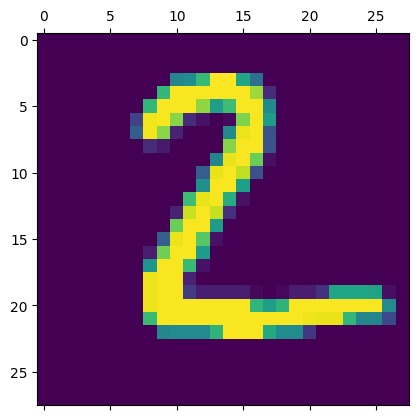

In [9]:
plt.matshow(x_test[1])

In [10]:
prediction = model.predict(x_test_flat)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


array([1.5641345e-02, 2.1813052e-07, 5.6130361e-02, 9.6141660e-01,
       2.3373107e-03, 1.3032918e-01, 1.2558329e-06, 9.9980140e-01,
       9.8002024e-02, 6.5009564e-01], dtype=float32)

In [11]:
np.argmax(prediction[1])

np.int64(2)

In [12]:
pred = [np.argmax(i) for i in prediction]
pred[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [13]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [14]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred)

In [15]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    3,    2,    0,    7,    6,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    9,  927,   15,   11,    5,   13,   10,   37,    2],
       [   1,    0,   18,  919,    1,   30,    2,   11,   23,    5],
       [   1,    1,    3,    1,  927,    0,    9,    3,   10,   27],
       [   7,    2,    2,   31,   10,  790,   11,    5,   29,    5],
       [   9,    3,    6,    1,    8,   17,  909,    2,    3,    0],
       [   1,    5,   22,    6,   11,    1,    0,  950,    3,   29],
       [   5,    7,    6,   19,    9,   33,    8,   10,  872,    5],
       [   9,    7,    2,   10,   36,    8,    0,   27,    8,  902]],
      dtype=int32)>

In [16]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


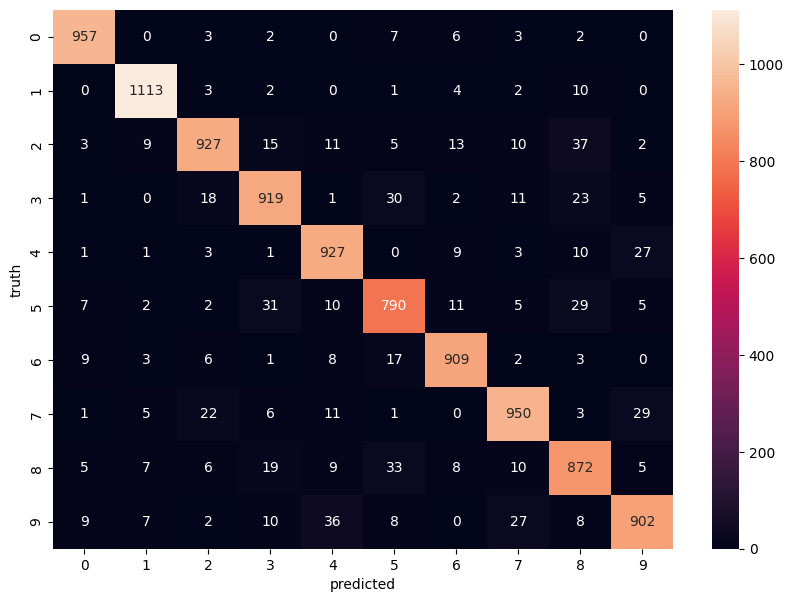

In [17]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flat, y_train, epochs=5)

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8739 - loss: 0.4506
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9614 - loss: 0.1340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9805 - loss: 0.0652
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0483


In [19]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1022


[0.08857592940330505, 0.9746000170707703]

In [20]:
prediction = model.predict(x_test_flat)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


array([9.7736284e-02, 9.0468362e-05, 8.7755179e-01, 9.5764792e-01,
       9.1838228e-06, 6.9594104e-04, 8.4926376e-07, 9.9999177e-01,
       5.5437371e-02, 1.1562070e-01], dtype=float32)

In [21]:
np.argmax(prediction[1])

np.int64(2)

In [22]:
pred = [np.argmax(i) for i in prediction]
pred[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred)

In [25]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    2,    1,    1,    1,    1,    3,    1],
       [   0, 1122,    2,    3,    0,    1,    1,    0,    6,    0],
       [   4,    2,  990,   12,    2,    0,    1,    7,   13,    1],
       [   0,    0,    1,  998,    0,    1,    0,    2,    5,    3],
       [   0,    0,    3,    0,  961,    0,    1,    0,    2,   15],
       [   2,    0,    0,   40,    1,  835,    1,    0,   11,    2],
       [   5,    3,    1,    1,    5,    4,  931,    1,    7,    0],
       [   0,    2,    5,    5,    0,    0,    0, 1002,    3,   11],
       [   1,    0,    2,    4,    3,    0,    1,    2,  959,    2],
       [   2,    2,    0,   11,    5,    1,    0,    6,    4,  978]],
      dtype=int32)>

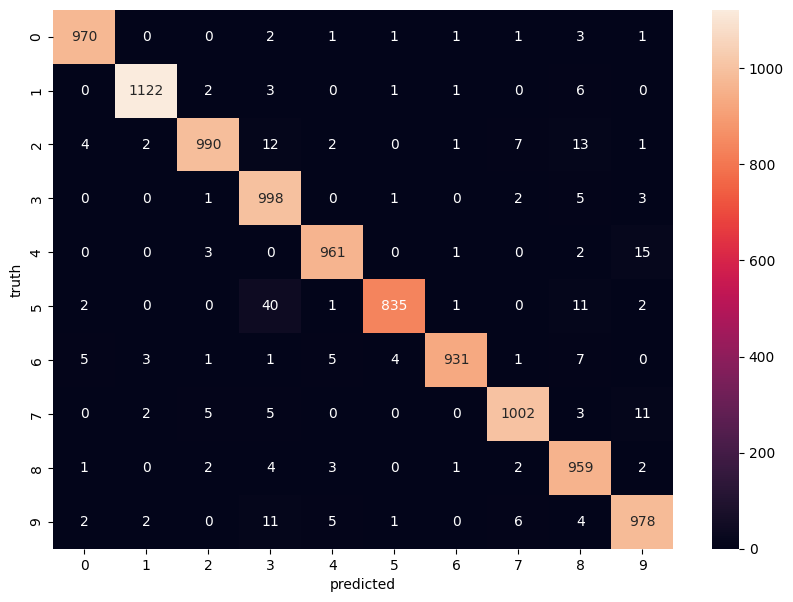

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=5)

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8749 - loss: 0.4433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9620 - loss: 0.1310
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9733 - loss: 0.0869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9808 - loss: 0.0633
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0499


In [28]:
!pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install pillow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import ipywidgets as widgets           # For the upload button
from IPython.display import display    # To display the widget
from PIL import Image                  # To handle image processing
import io                              # To read uploaded bytes
import numpy as np
import matplotlib.pyplot as plt



In [39]:
upload  = widgets.FileUpload(accept = '.png, .jpg, .jpeg', multiple = False)
display(upload)

FileUpload(value=(), accept='.png, .jpg, .jpeg', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


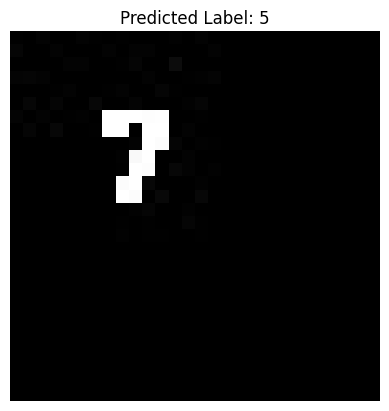

In [40]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Get uploaded image content
file_info = upload.value[0]
image_data = file_info['content']

# Open and preprocess image
img = Image.open(io.BytesIO(image_data)).convert("L")
img = img.resize((28, 28))

# Convert to numpy array and normalize
img_array = np.array(img) / 255.0

# Invert if background is white (MNIST has white digits on black background)
if np.mean(img_array) > 0.5:
    img_array = 1 - img_array

# Reshape for CNN input: (batch, height, width, channels)
img_array = img_array.reshape(1, 28, 28, 1)

# Predict using model
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction[0])

# Display result
plt.imshow(img_array.squeeze(), cmap='gray')  # remove batch and channel dims
plt.title(f"Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()
